# Time Series Data Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vega_datasets import data

## `sf_temps()`

In [2]:
# get data
df = data.sf_temps()

In [3]:
# take a look
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.shape

(8759, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [6]:
# make time data into index
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


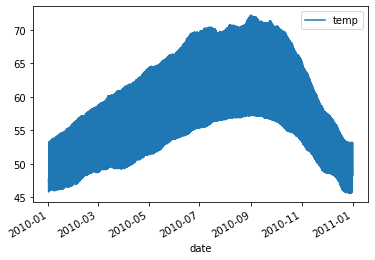

In [7]:
df.plot();

### 1.

Resample by the day and take the average temperature. Visualize the average temperature over time.

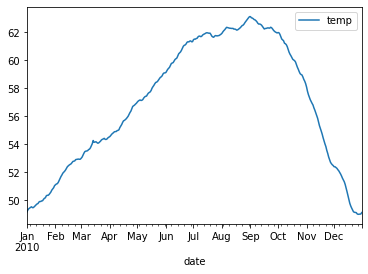

In [8]:
df.resample('D').mean().plot();

### 2.

Write the code necessary to visualize the minimum temperature over time.

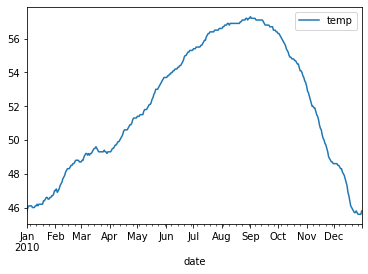

In [9]:
df.resample('D').min().plot();

### 3.

Write the code necessary to visualize the maximum temperature over time.

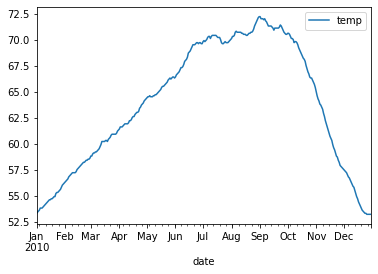

In [10]:
df.resample('D').max().plot();

### 4.

Which month is the coldest, on average?

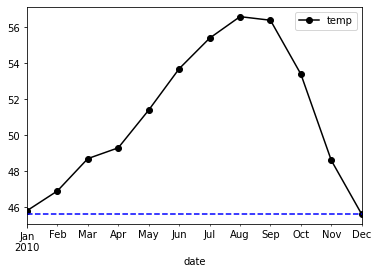

In [11]:
df.resample('M').min().plot(marker='o', color = 'black')
plt.axhline(df.resample('M').min().min()[0], ls='--', color = 'blue');

In [12]:
df.resample('M').min().style.highlight_min(color='blue')

,temp
date,
2010-01-31 00:00:00,45.800000
2010-02-28 00:00:00,46.900000
2010-03-31 00:00:00,48.700000
2010-04-30 00:00:00,49.300000
2010-05-31 00:00:00,51.400000
2010-06-30 00:00:00,53.700000
2010-07-31 00:00:00,55.400000
2010-08-31 00:00:00,56.600000
2010-09-30 00:00:00,56.400000


**December**

### 5.

Which month has the highest average temperature?

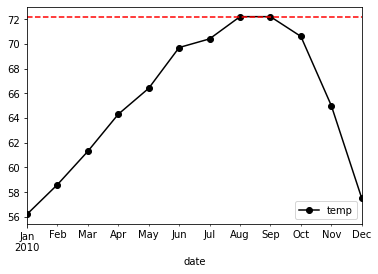

In [13]:
df.resample('M').max().plot(marker='o', color = 'black')
plt.axhline(df.resample('M').max().max()[0], ls='--', color = 'red')
plt.legend();

In [14]:
df.resample('M').max().style.highlight_max(color='red')

,temp
date,
2010-01-31 00:00:00,56.200000
2010-02-28 00:00:00,58.600000
2010-03-31 00:00:00,61.300000
2010-04-30 00:00:00,64.300000
2010-05-31 00:00:00,66.400000
2010-06-30 00:00:00,69.700000
2010-07-31 00:00:00,70.400000
2010-08-31 00:00:00,72.200000
2010-09-30 00:00:00,72.200000


**August and September**

### 6.

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [15]:
min_max = df.resample('D').agg(['min', 'max'])
min_max.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [16]:
min_max.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [17]:
min_max['daily_temp_delta'] = min_max[('temp', 'max')] - min_max[('temp', 'min')]

In [18]:
min_max.head()

temp       daily_temp_delta
             min   max                 
date                                   
2010-01-01  45.8  53.3              7.5
2010-01-02  46.0  53.4              7.4
2010-01-03  46.1  53.5              7.4
2010-01-04  46.1  53.6              7.5
2010-01-05  46.1  53.8              7.7

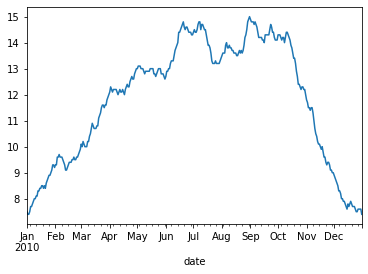

In [19]:
min_max.daily_temp_delta.plot();

In [20]:
# this shows the month with the highest average temperature delta
pd.DataFrame(min_max.daily_temp_delta.resample('M').mean()).style.highlight_max(color='green')

,daily_temp_delta
date,
2010-01-31 00:00:00,8.341935
2010-02-28 00:00:00,9.485714
2010-03-31 00:00:00,10.854839
2010-04-30 00:00:00,12.320000
2010-05-31 00:00:00,12.909677
2010-06-30 00:00:00,13.950000
2010-07-31 00:00:00,13.977419
2010-08-31 00:00:00,13.870968
2010-09-30 00:00:00,14.403333


In [21]:
# this finds the single data with the highest temp delta
min_max[min_max.daily_temp_delta == min_max.daily_temp_delta.max()]

temp       daily_temp_delta
             min   max                 
date                                   
2010-08-31  57.2  72.2             15.0

### 7. (Bonus)

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [22]:
daily_average = df.resample('D').mean()
daily_max = df.resample('D').max()
daily_min = df.resample('D').min()

In [23]:
dailies = df.resample('D').mean()

In [24]:
dailies['max'] = daily_max

In [25]:
dailies['min'] = daily_min

In [26]:
dailies = dailies.rename(columns={'temp' : 'avg'})

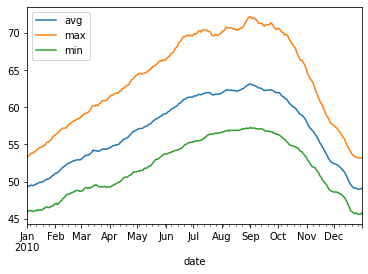

In [27]:
dailies.plot();

## `seattle_weather()`

In [28]:
df = data.seattle_weather()

In [29]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [30]:
df.shape

(1461, 6)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [32]:
df = df.set_index('date')

In [33]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1.

Which year and month combination has the highest amount of precipitation?

In [34]:
df[['precipitation']].resample('M').sum().sort_values(by='precipitation', ascending=False).head().style.highlight_max(color='blue')

,precipitation
date,
2015-12-31 00:00:00,284.500000
2014-03-31 00:00:00,240.000000
2015-11-30 00:00:00,212.600000
2012-11-30 00:00:00,210.500000
2012-03-31 00:00:00,183.000000


**December 2015 had the most total precipitation**

### 2.

Visualize the amount of monthly precipitation over time.

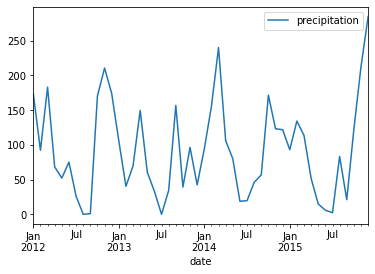

In [35]:
df[['precipitation']].resample('M').sum().plot();

### 3.

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

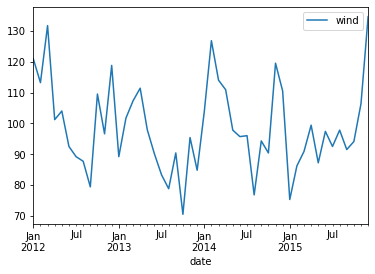

In [36]:
df[['wind']].resample('M').sum().plot();

### 4.

Which year-month combination is the windiest?

In [37]:
df[['wind']].resample('M').mean().sort_values(by='wind', ascending=False).head().style.highlight_max(color='blue')

,wind
date,
2014-02-28 00:00:00,4.528571
2015-12-31 00:00:00,4.341935
2012-03-31 00:00:00,4.248387
2014-11-30 00:00:00,3.983333
2012-02-29 00:00:00,3.903448


***February 2014 has the highest average wind speed***

### 5.

What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [38]:
df['year'] = df.index.year
df.head()

,precipitation,temp_max,temp_min,wind,weather,year
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,2012


In [39]:
sunny = df[['weather', 'year']]

In [40]:
sunny[sunny.weather == 'sun'].value_counts()

weather  year
sun      2014    211
         2013    205
         2015    180
         2012    118
dtype: int64

***2014 has the most sunny days***

In [41]:
pd.crosstab(df.year, df.weather).style.highlight_max(color='red')

weather,drizzle,fog,rain,snow,sun
year,,,,,
2012,31,5,191,21,118
2013,16,82,60,2,205
2014,0,151,3,0,211
2015,7,173,5,0,180


### 6.

In which month does it rain the most?

In [42]:
df['month'] = df.index.month
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1


In [43]:
pd.crosstab(df.month, df.weather).style.highlight_max(color='red')

weather,drizzle,fog,rain,snow,sun
month,,,,,
1,10,38,35,8,33
2,4,36,40,3,30
3,3,36,37,6,42
4,4,34,20,1,61
5,1,25,16,0,82
6,2,14,19,0,85
7,8,13,14,0,89
8,8,16,6,0,94
9,5,40,4,0,71


### 7.

Which month has the most number of days with a non-zero amount of precipitation?

In [44]:
df.precipitation != 0

date
2012-01-01    False
2012-01-02     True
2012-01-03     True
2012-01-04     True
2012-01-05     True
              ...  
2015-12-27     True
2015-12-28     True
2015-12-29    False
2015-12-30    False
2015-12-31    False
Name: precipitation, Length: 1461, dtype: bool

In [45]:
df['had_precip'] = np.where(df.precipitation != 0, 'Yes', 'No')

In [46]:
pd.crosstab(df.month, df.had_precip).style.highlight_max(color='red')

had_precip,No,Yes
month,,
1,58,66
2,40,73
3,51,73
4,61,59
5,90,34
6,83,37
7,113,11
8,102,22
9,85,35


## `flights_20k()`

In [47]:
df = data.flights_20k()

In [48]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [49]:
df.shape

(20000, 5)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [51]:
df = df.set_index('date')

In [52]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


In [53]:
(df.delay < 0).sum()

8482

### 1.

Convert any negative delays to 0.

In [54]:
df['delay'] = df.delay.apply(lambda x: 0 if x < 0 else x)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [55]:
(df.delay < 0).sum()

0

### 2.

Which hour of the day has the highest average delay?

In [56]:
# this gives us year, month, day, hour combination with highest average delay
df[['delay']].resample('H').mean().sort_values(by='delay', ascending=False).head().style.highlight_max(color='red')

,delay
date,
2001-02-23 03:00:00,360.000000
2001-02-25 00:00:00,260.000000
2001-01-02 03:00:00,245.000000
2001-02-24 22:00:00,210.000000
2001-02-22 00:00:00,195.000000


In [57]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [58]:
df.groupby('hour').delay.agg(['mean']).sort_values(by='mean', ascending=False).head().style.highlight_max(color='red')

,mean
hour,
3,302.500000
1,170.000000
0,127.916667
23,65.353846
22,32.704607


In [59]:
df.groupby('hour').delay.mean().sort_values(ascending=False).head()

hour
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
Name: delay, dtype: float64

### 3.

Does the day of the week make a difference in the delay amount?

In [60]:
df['week_day'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,week_day
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [61]:
df.groupby('week_day').delay.agg(['mean']).sort_values(by='mean', ascending=False).head().style.highlight_max(color='red')

,mean
week_day,
Friday,17.757596
Thursday,12.821322
Wednesday,11.032478
Sunday,10.413542
Tuesday,9.410866


### 4.

Does the month make a difference in the delay amount?

In [62]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,week_day,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March


In [63]:
df.groupby('month').delay.agg(['mean']).sort_values(by='mean', ascending=False).head().style.highlight_max(color='red')

,mean
month,
February,12.306106
January,11.301592
March,9.875287


# Bonus

## `iowa_electricity()` 

In [64]:
df = data.iowa_electricity()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [66]:
df.shape

(51, 3)

In [67]:
df.year[1]

Timestamp('2002-01-01 00:00:00')

In [68]:
df = df.set_index('year')

In [69]:
df.source.value_counts()

Fossil Fuels      17
Renewables        17
Nuclear Energy    17
Name: source, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2001-01-01 to 2017-01-01
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          51 non-null     object
 1   net_generation  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [71]:
df.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2002-01-01,Fossil Fuels,35991
2003-01-01,Fossil Fuels,36234
2004-01-01,Fossil Fuels,36205
2005-01-01,Fossil Fuels,36883


In [72]:
df['year_'] = df.index.year
df.head()

,source,net_generation,year_
year,,,
2001-01-01,Fossil Fuels,35361,2001
2002-01-01,Fossil Fuels,35991,2002
2003-01-01,Fossil Fuels,36234,2003
2004-01-01,Fossil Fuels,36205,2004
2005-01-01,Fossil Fuels,36883,2005


### 1.

For each row, calculate the percentage of the year's total that energy source provided.

In [73]:
year_list = df.year_.unique().tolist()

In [74]:
year_list

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [75]:
total_list = []

In [76]:
for year in year_list:
    total_list.append(df.net_generation[df.year_ == year].sum())

In [77]:
total_list

[40651,
 42528,
 42107,
 43236,
 44145,
 45473,
 49778,
 53086,
 51859,
 57509,
 56371,
 56675,
 56670,
 56854,
 56653,
 54381,
 56476]

In [78]:
year_df = pd.DataFrame(index=year_list, data = {'total_usage' : total_list})
year_df.head()

,total_usage
2001,40651
2002,42528
2003,42107
2004,43236
2005,44145


In [79]:
total_dict = year_df.to_dict()
total_dict

{'total_usage': {2001: 40651,
  2002: 42528,
  2003: 42107,
  2004: 43236,
  2005: 44145,
  2006: 45473,
  2007: 49778,
  2008: 53086,
  2009: 51859,
  2010: 57509,
  2011: 56371,
  2012: 56675,
  2013: 56670,
  2014: 56854,
  2015: 56653,
  2016: 54381,
  2017: 56476}}

In [80]:
total_usage_dict = total_dict['total_usage']
total_usage_dict

{2001: 40651,
 2002: 42528,
 2003: 42107,
 2004: 43236,
 2005: 44145,
 2006: 45473,
 2007: 49778,
 2008: 53086,
 2009: 51859,
 2010: 57509,
 2011: 56371,
 2012: 56675,
 2013: 56670,
 2014: 56854,
 2015: 56653,
 2016: 54381,
 2017: 56476}

In [81]:
df.head()

,source,net_generation,year_
year,,,
2001-01-01,Fossil Fuels,35361,2001
2002-01-01,Fossil Fuels,35991,2002
2003-01-01,Fossil Fuels,36234,2003
2004-01-01,Fossil Fuels,36205,2004
2005-01-01,Fossil Fuels,36883,2005


In [82]:
df['annual_total_usage'] = df.year_.map(total_usage_dict)

In [83]:
df.head()

,source,net_generation,year_,annual_total_usage
year,,,,
2001-01-01,Fossil Fuels,35361,2001,40651
2002-01-01,Fossil Fuels,35991,2002,42528
2003-01-01,Fossil Fuels,36234,2003,42107
2004-01-01,Fossil Fuels,36205,2004,43236
2005-01-01,Fossil Fuels,36883,2005,44145


In [85]:
df['annual_usage_percentage'] = (df.net_generation / df.annual_total_usage) * 100

In [86]:
df

,source,net_generation,year_,annual_total_usage,annual_usage_percentage
year,,,,,
2001-01-01,Fossil Fuels,35361,2001,40651,86.986790
2002-01-01,Fossil Fuels,35991,2002,42528,84.628950
2003-01-01,Fossil Fuels,36234,2003,42107,86.052200
2004-01-01,Fossil Fuels,36205,2004,43236,83.738089
2005-01-01,Fossil Fuels,36883,2005,44145,83.549666
2006-01-01,Fossil Fuels,37014,2006,45473,81.397753
2007-01-01,Fossil Fuels,41389,2007,49778,83.147173
2008-01-01,Fossil Fuels,42734,2008,53086,80.499567
2009-01-01,Fossil Fuels,38620,2009,51859,74.471162


### 2.

Lineplot of generation over time, color by source

In [90]:
df_plot = df.pivot_table(index='year_', columns='source', values='net_generation')
df_plot

source,Fossil Fuels,Nuclear Energy,Renewables
year_,,,
2001,35361,3853,1437
2002,35991,4574,1963
2003,36234,3988,1885
2004,36205,4929,2102
2005,36883,4538,2724
2006,37014,5095,3364
2007,41389,4519,3870
2008,42734,5282,5070
2009,38620,4679,8560


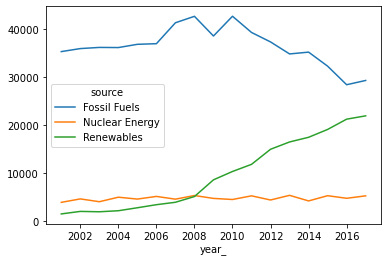

In [92]:
df_plot.plot();

### 3.

Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [102]:
df_ = df.pivot_table(columns='year_', index='source', values='net_generation')
df_

year_,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


### 4.

Make a line plot that shows the amount of energy generated over time.

In [94]:
df_plot.columns

Index(['Fossil Fuels', 'Nuclear Energy', 'Renewables'], dtype='object', name='source')

In [97]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2001 to 2017
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fossil Fuels    17 non-null     int64  
 1   Nuclear Energy  17 non-null     int64  
 2   Renewables      17 non-null     int64  
 3   total           0 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 680.0 bytes


In [98]:
df_plot['total'] = df_plot.sum(axis=1)

In [99]:
df_plot

source,Fossil Fuels,Nuclear Energy,Renewables,total
year_,,,,
2001,35361,3853,1437,40651.0
2002,35991,4574,1963,42528.0
2003,36234,3988,1885,42107.0
2004,36205,4929,2102,43236.0
2005,36883,4538,2724,44145.0
2006,37014,5095,3364,45473.0
2007,41389,4519,3870,49778.0
2008,42734,5282,5070,53086.0
2009,38620,4679,8560,51859.0


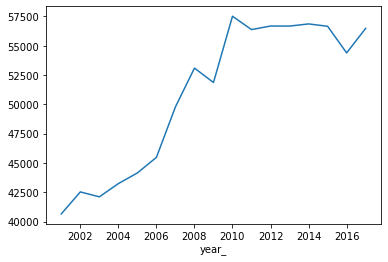

In [105]:
df_plot.total.plot();

### 5.

Is the total generation increasing over time?
 - How would you control for increasing consumption over time when considering how much energy is coming from each source?
 - express each number as a % of the year's total

In [87]:
df.head()

,source,net_generation,year_,annual_total_usage,annual_usage_percentage
year,,,,,
2001-01-01,Fossil Fuels,35361,2001,40651,86.986790
2002-01-01,Fossil Fuels,35991,2002,42528,84.628950
2003-01-01,Fossil Fuels,36234,2003,42107,86.052200
2004-01-01,Fossil Fuels,36205,2004,43236,83.738089
2005-01-01,Fossil Fuels,36883,2005,44145,83.549666


In [90]:
control_df = df.pivot_table(columns='source', index='year_', values='annual_usage_percentage')
control_df

source,Fossil Fuels,Nuclear Energy,Renewables
year_,,,
2001,86.986790,9.478242,3.534968
2002,84.628950,10.755267,4.615783
2003,86.052200,9.471109,4.476690
2004,83.738089,11.400222,4.861689
2005,83.549666,10.279760,6.170574
2006,81.397753,11.204451,7.397796
2007,83.147173,9.078308,7.774519
2008,80.499567,9.949893,9.550541
2009,74.471162,9.022542,16.506296


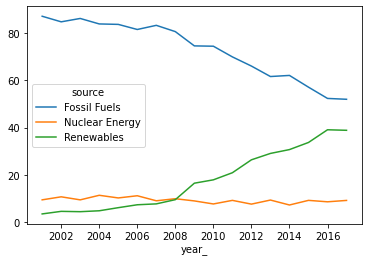

In [92]:
control_df.plot();

## `sf_temps()`

Use the sf_temps dataset

In [96]:
df = data.sf_temps()

In [97]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [100]:
df = df.set_index('date')

In [102]:
df.shape

(8759, 1)

In [103]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### 1.

In [104]:
df.describe()

,temp
count,8759.000000
mean,56.924112
std,6.107079
min,45.600000
25%,52.300000
50%,56.500000
75%,60.700000
max,72.200000


Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [108]:
df['temp_cat'] = pd.cut(df.temp, bins=[45.6, 52.3, 56.5, 60.7, 72.2], labels=['cold', 'cool', 'warm', 'hot'])

In [109]:
df.head()

,temp,temp_cat
date,,
2010-01-01 00:00:00,47.8,cold
2010-01-01 01:00:00,47.4,cold
2010-01-01 02:00:00,46.9,cold
2010-01-01 03:00:00,46.5,cold
2010-01-01 04:00:00,46.0,cold


In [110]:
df.temp_cat.value_counts()

cool    2218
cold    2204
hot     2175
warm    2156
Name: temp_cat, dtype: int64

### 2.

How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [ ]:
# resample by day first, add a month column, then do a crosstab by month and temp_cat

### 3.

Create pretty labels for time plots

### 4.

Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar